In [1]:
import pandas as pd
import numpy as np

data_frame = pd.read_csv('./records-for-2016.csv')
#编写数据摘要
data_frame.head()

,Agency,Create Time,Location,Area Id,Beat,Priority,Incident Type Id,Incident Type Description,Event Number,Closed Time
0,OP,2016-01-01T00:00:57.000,ST&MARKET ST,P1,05X,2.0,415GS,415 GUNSHOTS,LOP160101000003,2016-01-01T00:32:30.000
1,OP,2016-01-01T00:01:25.000,AV&HAMILTON ST,P3,26Y,2.0,415GS,415 GUNSHOTS,LOP160101000005,2016-01-01T00:48:23.000
2,OP,2016-01-01T00:01:43.000,ST&CHESTNUT ST,P1,02X,2.0,415GS,415 GUNSHOTS,LOP160101000008,2016-01-01T00:21:24.000
3,OP,2016-01-01T00:01:48.000,WALLACE ST,P2,18Y,2.0,415GS,415 GUNSHOTS,LOP160101000007,2016-01-01T01:15:03.000
4,OP,2016-01-01T00:02:05.000,90TH AV,P3,34X,2.0,415GS,415 GUNSHOTS,LOP160101000009,2016-01-01T00:54:52.000


In [2]:
data_frame.dtypes

Agency                        object
Create Time                   object
Location                      object
Area Id                       object
Beat                          object
Priority                     float64
Incident Type Id              object
Incident Type Description     object
Event Number                  object
Closed Time                   object
dtype: object

# 统计标升属性的频数

In [5]:
data_frame['Agency'].value_counts()

OP    110827
Name: Agency, dtype: int64

In [6]:
data_frame['Create Time'].value_counts()

2016-05-06T11:21:13.000    3
2016-06-02T21:40:23.000    2
2016-06-17T01:00:06.000    2
2016-05-29T01:59:56.000    2
2016-06-29T21:41:52.000    2
                          ..
2016-02-24T17:12:59.000    1
2016-01-01T07:12:36.000    1
2016-04-07T21:04:47.000    1
2016-02-21T12:50:56.000    1
2016-02-24T14:37:34.000    1
Name: Create Time, Length: 110453, dtype: int64

In [7]:
data_frame['Location'].value_counts()

 INTERNATIONAL BLVD           2156
 AV&INTERNATIONAL BLVD        1829
 MACARTHUR BLVD               1813
 BROADWAY                     1472
 7TH ST                       1223
                              ... 
DOOLITTLE SUTER ST               1
14TH SANTA RITA ST               1
18TH ST&CHESTNUT ST              1
E AV&DAVIS ST                    1
72ND ST&JENSEN ST                1
Name: Location, Length: 24046, dtype: int64

In [8]:
data_frame['Area Id'].value_counts()

P3     47425
P1     41419
P2     19610
POU     2173
PCW      194
TEC        4
JLS        1
WAG        1
Name: Area Id, dtype: int64

In [9]:
data_frame['Beat'].value_counts()

04X     4515
08X     3931
26Y     3511
30Y     3473
19X     3455
30X     3416
03X     3195
23X     3076
34X     2857
07X     2831
20X     2702
29X     2646
06X     2580
03Y     2562
27Y     2517
25X     2467
31Y     2460
27X     2333
35X     2328
32X     2316
33X     2276
09X     2158
21Y     2100
32Y     2093
12Y     1987
14X     1832
26X     1766
02X     1746
24X     1704
02Y     1659
10Y     1573
10X     1557
22X     1541
17Y     1482
21X     1479
24Y     1454
31X     1439
22Y     1420
13Z     1397
15X     1393
05X     1342
01X     1304
12X     1299
31Z     1268
28X     1261
11X     1208
35Y     1159
18Y     1102
14Y     1027
17X      969
13Y      952
16Y      907
25Y      739
18X      721
16X      708
13X      630
05Y      408
PDT2      16
Name: Beat, dtype: int64

In [11]:
data_frame['Event Number'].value_counts()

LOP160430000435    1
LOP160407000839    1
LOP160620000267    1
LOP160706000141    1
LOP160717000366    1
                  ..
LOP160211000630    1
LOP160413001065    1
LOP160619000165    1
LOP160413001088    1
LOP160103000328    1
Name: Event Number, Length: 110827, dtype: int64

# 数值属性的五数概括

In [12]:
number_data = ['Priority']
data_frame[number_data].describe()

,Priority
count,110827.000000
mean,1.778438
std,0.415299
min,1.000000
25%,2.000000
50%,2.000000
75%,2.000000
max,2.000000


<AxesSubplot:>

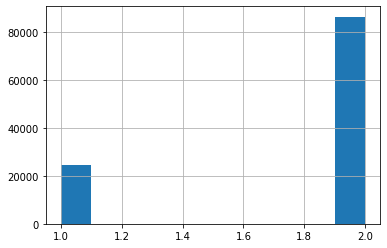

In [14]:
data_frame['Priority'].hist()

# 绘制points的q-q图

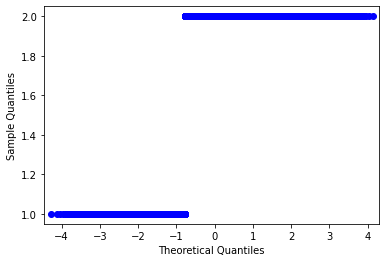

In [16]:

import statsmodels.api as sm
import pylab

sm.qqplot(data_frame['Priority'], line='s')
pylab.show()

# 绘制points的盒图,数据中只有0和1

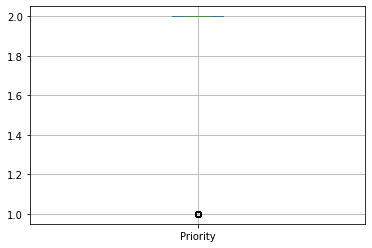

In [17]:
import matplotlib.pyplot as plt

data_frame['Priority'].plot(kind='box', notch=True, grid=True)
plt.show()

# 缺失数据处理

In [18]:
def missing_data(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    return(np.transpose(tt))
missing_data(data_frame)

,Agency,Create Time,Location,Area Id,Beat,Priority,Incident Type Id,Incident Type Description,Event Number,Closed Time
Total,1,1,0,1,581,1,1,1,1,1
Percent,0.000902299,0.000902299,0,0.000902299,0.524236,0.000902299,0.000902299,0.000902299,0.000902299,0.000902299
Types,object,object,object,object,object,float64,object,object,object,object


In [22]:
del_df = data_frame.dropna()
del_df.shape
del_df.head()

,Agency,Create Time,Location,Area Id,Beat,Priority,Incident Type Id,Incident Type Description,Event Number,Closed Time
0,OP,2016-01-01T00:00:57.000,ST&MARKET ST,P1,05X,2.0,415GS,415 GUNSHOTS,LOP160101000003,2016-01-01T00:32:30.000
1,OP,2016-01-01T00:01:25.000,AV&HAMILTON ST,P3,26Y,2.0,415GS,415 GUNSHOTS,LOP160101000005,2016-01-01T00:48:23.000
2,OP,2016-01-01T00:01:43.000,ST&CHESTNUT ST,P1,02X,2.0,415GS,415 GUNSHOTS,LOP160101000008,2016-01-01T00:21:24.000
3,OP,2016-01-01T00:01:48.000,WALLACE ST,P2,18Y,2.0,415GS,415 GUNSHOTS,LOP160101000007,2016-01-01T01:15:03.000
4,OP,2016-01-01T00:02:05.000,90TH AV,P3,34X,2.0,415GS,415 GUNSHOTS,LOP160101000009,2016-01-01T00:54:52.000


# 用最高频率值填充

In [24]:
from collections import Counter
from math import isnan

miss_features = ['Agency','Create Time','Location','Area Id', 'Beat','Priority','Incident Type Id','Incident Type Description','Event Number','Closed Time']
fill_df = data_frame

for col in miss_features:
    word_counts = Counter(fill_df[col])
    top = word_counts.most_common(1)[0][0]
    if type(top) != str:
        if isnan(top):
            top = word_counts.most_common(2)[1][0]
    print(top, type(top))
    temp = fill_df[col].fillna(top)
    fill_df[col] = temp
fill_df.head()

OP <class 'str'>
2016-05-06T11:21:13.000 <class 'str'>
 INTERNATIONAL BLVD     <class 'str'>
P3 <class 'str'>
04X <class 'str'>
2.0 <class 'float'>
933R <class 'str'>
ALARM-RINGER <class 'str'>
LOP160101000003 <class 'str'>
2016-05-29T00:43:38.000 <class 'str'>


,Agency,Create Time,Location,Area Id,Beat,Priority,Incident Type Id,Incident Type Description,Event Number,Closed Time
0,OP,2016-01-01T00:00:57.000,ST&MARKET ST,P1,05X,2.0,415GS,415 GUNSHOTS,LOP160101000003,2016-01-01T00:32:30.000
1,OP,2016-01-01T00:01:25.000,AV&HAMILTON ST,P3,26Y,2.0,415GS,415 GUNSHOTS,LOP160101000005,2016-01-01T00:48:23.000
2,OP,2016-01-01T00:01:43.000,ST&CHESTNUT ST,P1,02X,2.0,415GS,415 GUNSHOTS,LOP160101000008,2016-01-01T00:21:24.000
3,OP,2016-01-01T00:01:48.000,WALLACE ST,P2,18Y,2.0,415GS,415 GUNSHOTS,LOP160101000007,2016-01-01T01:15:03.000
4,OP,2016-01-01T00:02:05.000,90TH AV,P3,34X,2.0,415GS,415 GUNSHOTS,LOP160101000009,2016-01-01T00:54:52.000


In [25]:
missing_data(fill_df)

,Agency,Create Time,Location,Area Id,Beat,Priority,Incident Type Id,Incident Type Description,Event Number,Closed Time
Total,0,0,0,0,0,0,0,0,0,0
Percent,0,0,0,0,0,0,0,0,0,0
Types,object,object,object,object,object,float64,object,object,object,object


# 通过属性相关关系填充

In [28]:
data_frame.corr()

,Priority
Priority,1.0


In [29]:
data_frame.corr('spearman')

,Priority
Priority,1.0
